# The Sparks Foundation
## Graduate Rotational Internship Program

### Task 1
#### Prediction using Supervised ML
##### Predict the percentage of an student based on the no. of study hours.
##### Predict the percentage of an student based on the no. of study hours. This is a simple linear regression task as it involves just 2 variables.

##### What will be predicted score if a student studies for 9.25 hrs/ day?

##### Author: Elza Cherian

##### Importing the libraries required

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

##### Accessing the data

In [11]:
url="http://bit.ly/w-data"
data = pd.read_csv(url)
print("Data imported successfully")

data

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
#checking for null values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

##### Since there are no null data, cleaning is not required
##### Visualizing our data on a 2-D graph

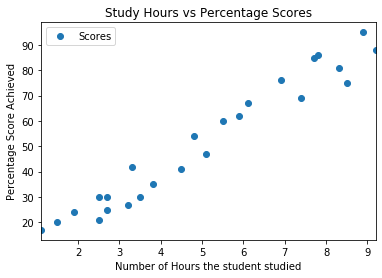

In [13]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Study Hours vs Percentage Scores')  
plt.xlabel('Number of Hours the student studied')  
plt.ylabel('Percentage Score Achieved')  
plt.show()

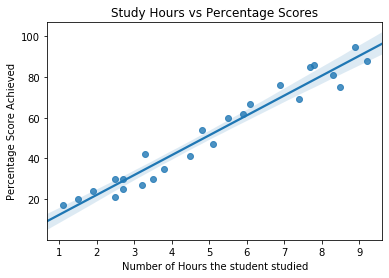

In [14]:
sns.regplot(x=data['Hours'],y=data['Scores'],data=data)
plt.title('Study Hours vs Percentage Scores')
plt.xlabel('Number of Hours the student studied')
plt.ylabel('Percentage Score Achieved')
plt.show()

##### From the graph, we conclude that there is a positive linear relationship between the 2 variables (number of hours studied and percentage of score)

### Preparation of our data

### Next we define the "attributes"(input) variable and "labels"(output)



In [15]:
X = data.iloc[:, :-1].values  #Attribute
y = data.iloc[:, 1].values    #Labels

### Now that we have the attributes and labels defined, the next step is to split this data into training and test sets.


In [16]:
# Using Scikit-Learn's built-in train_test_split() method:

from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Now we have our training and testing datasets to train our model

## Training of the Algorithm
## Using Scikit-Learn library


In [17]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Training complete.")

Training complete.


In [18]:
print ("Coefficient -", regressor.coef_)
print ("Intercept - ", regressor.intercept_)

Coefficient - [9.68207815]
Intercept -  2.826892353899737


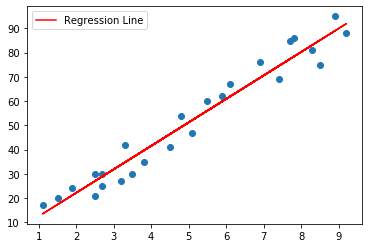

In [19]:
# Plotting the regression line
line = regressor.coef_*X + regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line,color='red', label='Regression Line')
plt.legend()
plt.show()

## Making Predictions
## Now that we have trained our algorithm, it's time to make some predictions.

In [20]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [21]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


In [22]:
#Estimating training and test score
print("Training Score:",regressor.score(X_train,y_train))
print("Test Score:",regressor.score(X_test,y_test))

Training Score: 0.9491209376364417
Test Score: 0.9678055545167994


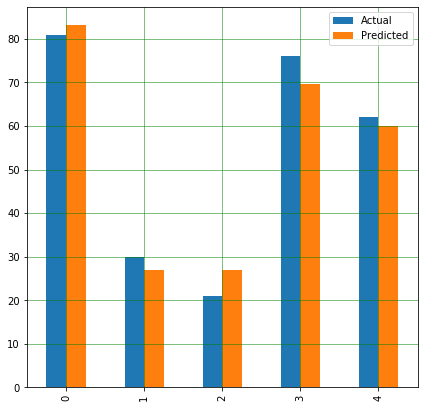

In [23]:
#plotting the grid to depict the actual and predicted value
df.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linewidth='0.5', color='green')
plt.grid(which='minor', linewidth='0.5', color='black')
plt.show()

In [24]:
# Testing with some new data
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = regressor.predict(test)
print("No of Hours studied = {}".format(hours))
print("Predicted Score achieved= {}".format(own_pred[0]))

No of Hours studied = 9.25
Predicted Score achieved= 92.38611528261494


#### Evaulating the model
### Final step is to evaluate the performance

In [25]:
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288
R-2: 0.9678055545167994
